In [ ]:
!pip install --upgrade gspread

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.1.4
    Uninstalling gspread-6.1.4:
      Successfully uninstalled gspread-6.1.4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.auth import default

# Authenticate and create a client
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [ ]:
spreadsheet = gc.open("Oasis 1 Freesurfer Data").sheet1

# Now you can work with the 'worksheet' object, for example, fetching the data
data = spreadsheet.get_all_values()
print(data)

[['ID', 'M/F', 'Age', 'eTIV', 'nWBV', 'ASF', 'CDR'], ['OAS1_0001_MR1', 'F', '74', '1344', '0.743', '1.306', 'CN'], ['OAS1_0002_MR1', 'F', '55', '1147', '0.81', '1.531', 'CN'], ['OAS1_0003_MR1', 'F', '73', '1454', '0.708', '1.207', 'MCI'], ['OAS1_0010_MR1', 'M', '74', '1636', '0.689', '1.073', 'CN'], ['OAS1_0011_MR1', 'F', '52', '1321', '0.827', '1.329', 'CN'], ['OAS1_0013_MR1', 'F', '81', '1664', '0.679', '1.055', 'CN'], ['OAS1_0015_MR1', 'M', '76', '1738', '0.719', '1.01', 'MCI'], ['OAS1_0016_MR1', 'M', '82', '1477', '0.739', '1.188', 'MCI'], ['OAS1_0018_MR1', 'M', '39', '1636', '0.813', '1.073', 'CN'], ['OAS1_0019_MR1', 'F', '89', '1536', '0.715', '1.142', 'CN'], ['OAS1_0020_MR1', 'F', '48', '1326', '0.785', '1.323', 'CN'], ['OAS1_0021_MR1', 'F', '80', '1794', '0.765', '0.978', 'MCI'], ['OAS1_0022_MR1', 'F', '69', '1447', '0.757', '1.213', 'MCI'], ['OAS1_0023_MR1', 'M', '82', '1420', '0.71', '1.236', 'MCI'], ['OAS1_0026_MR1', 'F', '58', '1235', '0.82', '1.421', 'CN'], ['OAS1_0028_MR1

In [ ]:
import pandas as pd
df = pd.DataFrame(data[1:], columns=data[0])
df.head()

,ID,M/F,Age,eTIV,nWBV,ASF,CDR
0,OAS1_0001_MR1,F,74,1344,0.743,1.306,CN
1,OAS1_0002_MR1,F,55,1147,0.81,1.531,CN
2,OAS1_0003_MR1,F,73,1454,0.708,1.207,MCI
3,OAS1_0010_MR1,M,74,1636,0.689,1.073,CN
4,OAS1_0011_MR1,F,52,1321,0.827,1.329,CN


In [ ]:
len(df)

235

#Extracting Morphometric Volumes#



In [ ]:
alzheimers_features = [
    'Left-Hippocampus',
    'Right-Hippocampus',
    'Left-Amygdala',
    'Right-Amygdala',
    'Left-Cerebral-Cortex',
    'Right-Cerebral-Cortex',
    'Left-Thalamus-Proper',
    'Right-Thalamus-Proper'
]

#took out these features as we do not have the resources to process so much data -- google collab freezes
'''
    'Left-Caudate',
    'Right-Caudate',
    'Left-Putamen',
    'Right-Putamen',
    'Left-Lateral-Ventricle',
    'Right-Lateral-Ventricle',
    '3rd-Ventricle',
    'WM-hypointensities',
    'CSF'
'''

"\n    'Left-Caudate',\n    'Right-Caudate',\n    'Left-Putamen',\n    'Right-Putamen',\n    'Left-Lateral-Ventricle',\n    'Right-Lateral-Ventricle',\n    '3rd-Ventricle',\n    'WM-hypointensities',\n    'CSF'\n"

In [ ]:
import os

patients_data = {}
def extract_volumes(path, file_name, diagnosis):
  folder_path = os.path.join(path, file_name)

  if not os.path.isdir(folder_path):
      print(f"Folder {file_name} not found")


  #path for the folder containting all the volumes
  stats_path = os.path.join(folder_path, 'stats/aseg.stats')

  # Check if the stats file exists
  if not os.path.isfile(stats_path):
      print(f"aseg.stats file not found in {file_name}")
      return None

  with open(stats_path, 'r') as file:
      lines = file.readlines()

  #finding where the information starts
  start = None
  for i, line in enumerate(lines):
      if "ColHeaders" in line:
          start = i + 1
          break

  data = lines[start:]

  id_brain_data = []

  for line in data:
      columns = line.split()

      # incomplete data
      if len(columns) < 10:
          continue

      struct_name = columns[4]
      volume = float(columns[3])

      if struct_name in alzheimers_features:
        id_brain_data.append((str(struct_name),volume))

  id_brain_data.append(("diagnosis",  diagnosis))
  patients_data[file_name] = id_brain_data

In [ ]:
for id, cdr in zip(df['ID'], df['CDR']):
  extract_volumes("/content/drive/MyDrive/Project COMP MSc 2024 25/Morphometric Features/disc1",id, cdr )

Folder OAS1_0053_MR1 not found
aseg.stats file not found in OAS1_0053_MR1
Folder OAS1_0110_MR1 not found
aseg.stats file not found in OAS1_0110_MR1
Folder OAS1_0164_MR1 not found
aseg.stats file not found in OAS1_0164_MR1
Folder OAS1_0165_MR1 not found
aseg.stats file not found in OAS1_0165_MR1
Folder OAS1_0166_MR1 not found
aseg.stats file not found in OAS1_0166_MR1
Folder OAS1_0169_MR1 not found
aseg.stats file not found in OAS1_0169_MR1
Folder OAS1_0170_MR1 not found
aseg.stats file not found in OAS1_0170_MR1
Folder OAS1_0176_MR1 not found
aseg.stats file not found in OAS1_0176_MR1
Folder OAS1_0177_MR1 not found
aseg.stats file not found in OAS1_0177_MR1
Folder OAS1_0179_MR1 not found
aseg.stats file not found in OAS1_0179_MR1
Folder OAS1_0180_MR1 not found
aseg.stats file not found in OAS1_0180_MR1
Folder OAS1_0181_MR1 not found
aseg.stats file not found in OAS1_0181_MR1
Folder OAS1_0184_MR1 not found
aseg.stats file not found in OAS1_0184_MR1
Folder OAS1_0185_MR1 not found
aseg.st

In [ ]:
print(patients_data)

{'OAS1_0001_MR1': [('Left-Cerebral-Cortex', 188486.0), ('Left-Thalamus-Proper', 5254.0), ('Left-Hippocampus', 3487.0), ('Left-Amygdala', 1217.0), ('Right-Cerebral-Cortex', 186230.0), ('Right-Thalamus-Proper', 5408.0), ('Right-Hippocampus', 3819.0), ('Right-Amygdala', 1334.0), ('diagnosis', 'CN')], 'OAS1_0002_MR1': [('Left-Cerebral-Cortex', 184712.0), ('Left-Thalamus-Proper', 5246.0), ('Left-Hippocampus', 3807.0), ('Left-Amygdala', 1529.0), ('Right-Cerebral-Cortex', 181619.0), ('Right-Thalamus-Proper', 5341.0), ('Right-Hippocampus', 4230.0), ('Right-Amygdala', 1593.0), ('diagnosis', 'CN')], 'OAS1_0003_MR1': [('Left-Cerebral-Cortex', 198592.0), ('Left-Thalamus-Proper', 5554.0), ('Left-Hippocampus', 2801.0), ('Left-Amygdala', 798.0), ('Right-Cerebral-Cortex', 198807.0), ('Right-Thalamus-Proper', 5503.0), ('Right-Hippocampus', 2896.0), ('Right-Amygdala', 899.0), ('diagnosis', 'MCI')], 'OAS1_0010_MR1': [('Left-Cerebral-Cortex', 190347.0), ('Left-Thalamus-Proper', 5578.0), ('Left-Hippocampus

#Data Processing#

In [ ]:
columns = ['Left-Hippocampus',
    'Right-Hippocampus',
    'Left-Amygdala',
    'Right-Amygdala',
    'Left-Cerebral-Cortex',
    'Right-Cerebral-Cortex',
    'Left-Thalamus-Proper',
    'Right-Thalamus-Proper','diagnosis']

rows = {}

for patient_id, brain_data in patients_data.items():
    row = {region: value for region, value in brain_data}
    rows[patient_id] = row

df = pd.DataFrame.from_dict(rows, orient='index', columns=columns)

df.head()

,Left-Hippocampus,Right-Hippocampus,Left-Amygdala,Right-Amygdala,Left-Cerebral-Cortex,Right-Cerebral-Cortex,Left-Thalamus-Proper,Right-Thalamus-Proper,diagnosis
OAS1_0001_MR1,3487.0,3819.0,1217.0,1334.0,188486.0,186230.0,5254.0,5408.0,CN
OAS1_0002_MR1,3807.0,4230.0,1529.0,1593.0,184712.0,181619.0,5246.0,5341.0,CN
OAS1_0003_MR1,2801.0,2896.0,798.0,899.0,198592.0,198807.0,5554.0,5503.0,MCI
OAS1_0010_MR1,2578.0,2832.0,883.0,1190.0,190347.0,191016.0,5578.0,5627.0,CN
OAS1_0011_MR1,4080.0,3978.0,1234.0,1414.0,195319.0,199954.0,5937.0,5863.0,CN


In [ ]:
len(df)

78

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']               # Target: 'CN', 'MCI', 'AD'

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("Coefficients:", model.coef_)
print("Intercepts:", model.intercept_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.75

Confusion Matrix:
 [[0 1 1]
 [0 7 2]
 [0 0 5]]

Classification Report:
               precision    recall  f1-score   support

          AD       0.00      0.00      0.00         2
          CN       0.88      0.78      0.82         9
         MCI       0.62      1.00      0.77         5

    accuracy                           0.75        16
   macro avg       0.50      0.59      0.53        16
weighted avg       0.69      0.75      0.70        16

Coefficients: [[-2.23484974e-04 -1.46184400e-03 -2.60551945e-03 -2.68485369e-04
  -4.07538055e-05  6.35342955e-05  2.74078690e-03 -2.03776045e-03]
 [ 8.03190087e-05  2.35371556e-03  3.43176170e-03  1.07245334e-03
   6.51525343e-05 -1.09472460e-04 -1.59038374e-04 -7.32887879e-04]
 [ 1.43165965e-04 -8.91871555e-04 -8.26242249e-04 -8.03967975e-04
  -2.43987288e-05  4.59381646e-05 -2.58174852e-03  2.77064833e-03]]
Intercepts: [ 7.75687458e-06 -2.90760715e-07 -7.46611387e-06]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pandas as pd

# 1. Coefficients per class
coef_df = pd.DataFrame(model.coef_, columns=X.columns)
coef_df.index = model.classes_  # Each row corresponds to a diagnosis label
print("Coefficients for each class:\n", coef_df)

# 2. Average absolute importance across classes
mean_importance = np.mean(np.abs(model.coef_), axis=0)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Average_Absolute_Coefficient': mean_importance
})
importance_df = importance_df.sort_values(by='Average_Absolute_Coefficient', ascending=False)
print("\nAverage absolute coefficient for each feature (higher means more impact):")
print(importance_df)


Coefficients for each class:
      Left-Hippocampus  Right-Hippocampus  Left-Amygdala  Right-Amygdala  \
AD          -0.000223          -0.001462      -0.002606       -0.000268   
CN           0.000080           0.002354       0.003432        0.001072   
MCI          0.000143          -0.000892      -0.000826       -0.000804   

     Left-Cerebral-Cortex  Right-Cerebral-Cortex  Left-Thalamus-Proper  \
AD              -0.000041               0.000064              0.002741   
CN               0.000065              -0.000109             -0.000159   
MCI             -0.000024               0.000046             -0.002582   

     Right-Thalamus-Proper  
AD               -0.002038  
CN               -0.000733  
MCI               0.002771  

Average absolute coefficient for each feature (higher means more impact):
                 Feature  Average_Absolute_Coefficient
2          Left-Amygdala                      0.002288
7  Right-Thalamus-Proper                      0.001847
6   Left-Thalamu

Coefficients for each class:
      Left-Hippocampus  Right-Hippocampus  Left-Amygdala  Right-Amygdala  \
AD          -0.000223          -0.001462      -0.002606       -0.000268   
CN           0.000080           0.002354       0.003432        0.001072   
MCI          0.000143          -0.000892      -0.000826       -0.000804   

     Left-Cerebral-Cortex  Right-Cerebral-Cortex  Left-Thalamus-Proper  \
AD              -0.000041               0.000064              0.002741   
CN               0.000065              -0.000109             -0.000159   
MCI             -0.000024               0.000046             -0.002582   

     Right-Thalamus-Proper  
AD               -0.002038  
CN               -0.000733  
MCI               0.002771  

Average absolute coefficient for each feature (higher means more impact):
                 Feature  Average_Absolute_Coefficient
2          Left-Amygdala                      0.002288
7  Right-Thalamus-Proper                      0.001847
6   Left-Thalamu

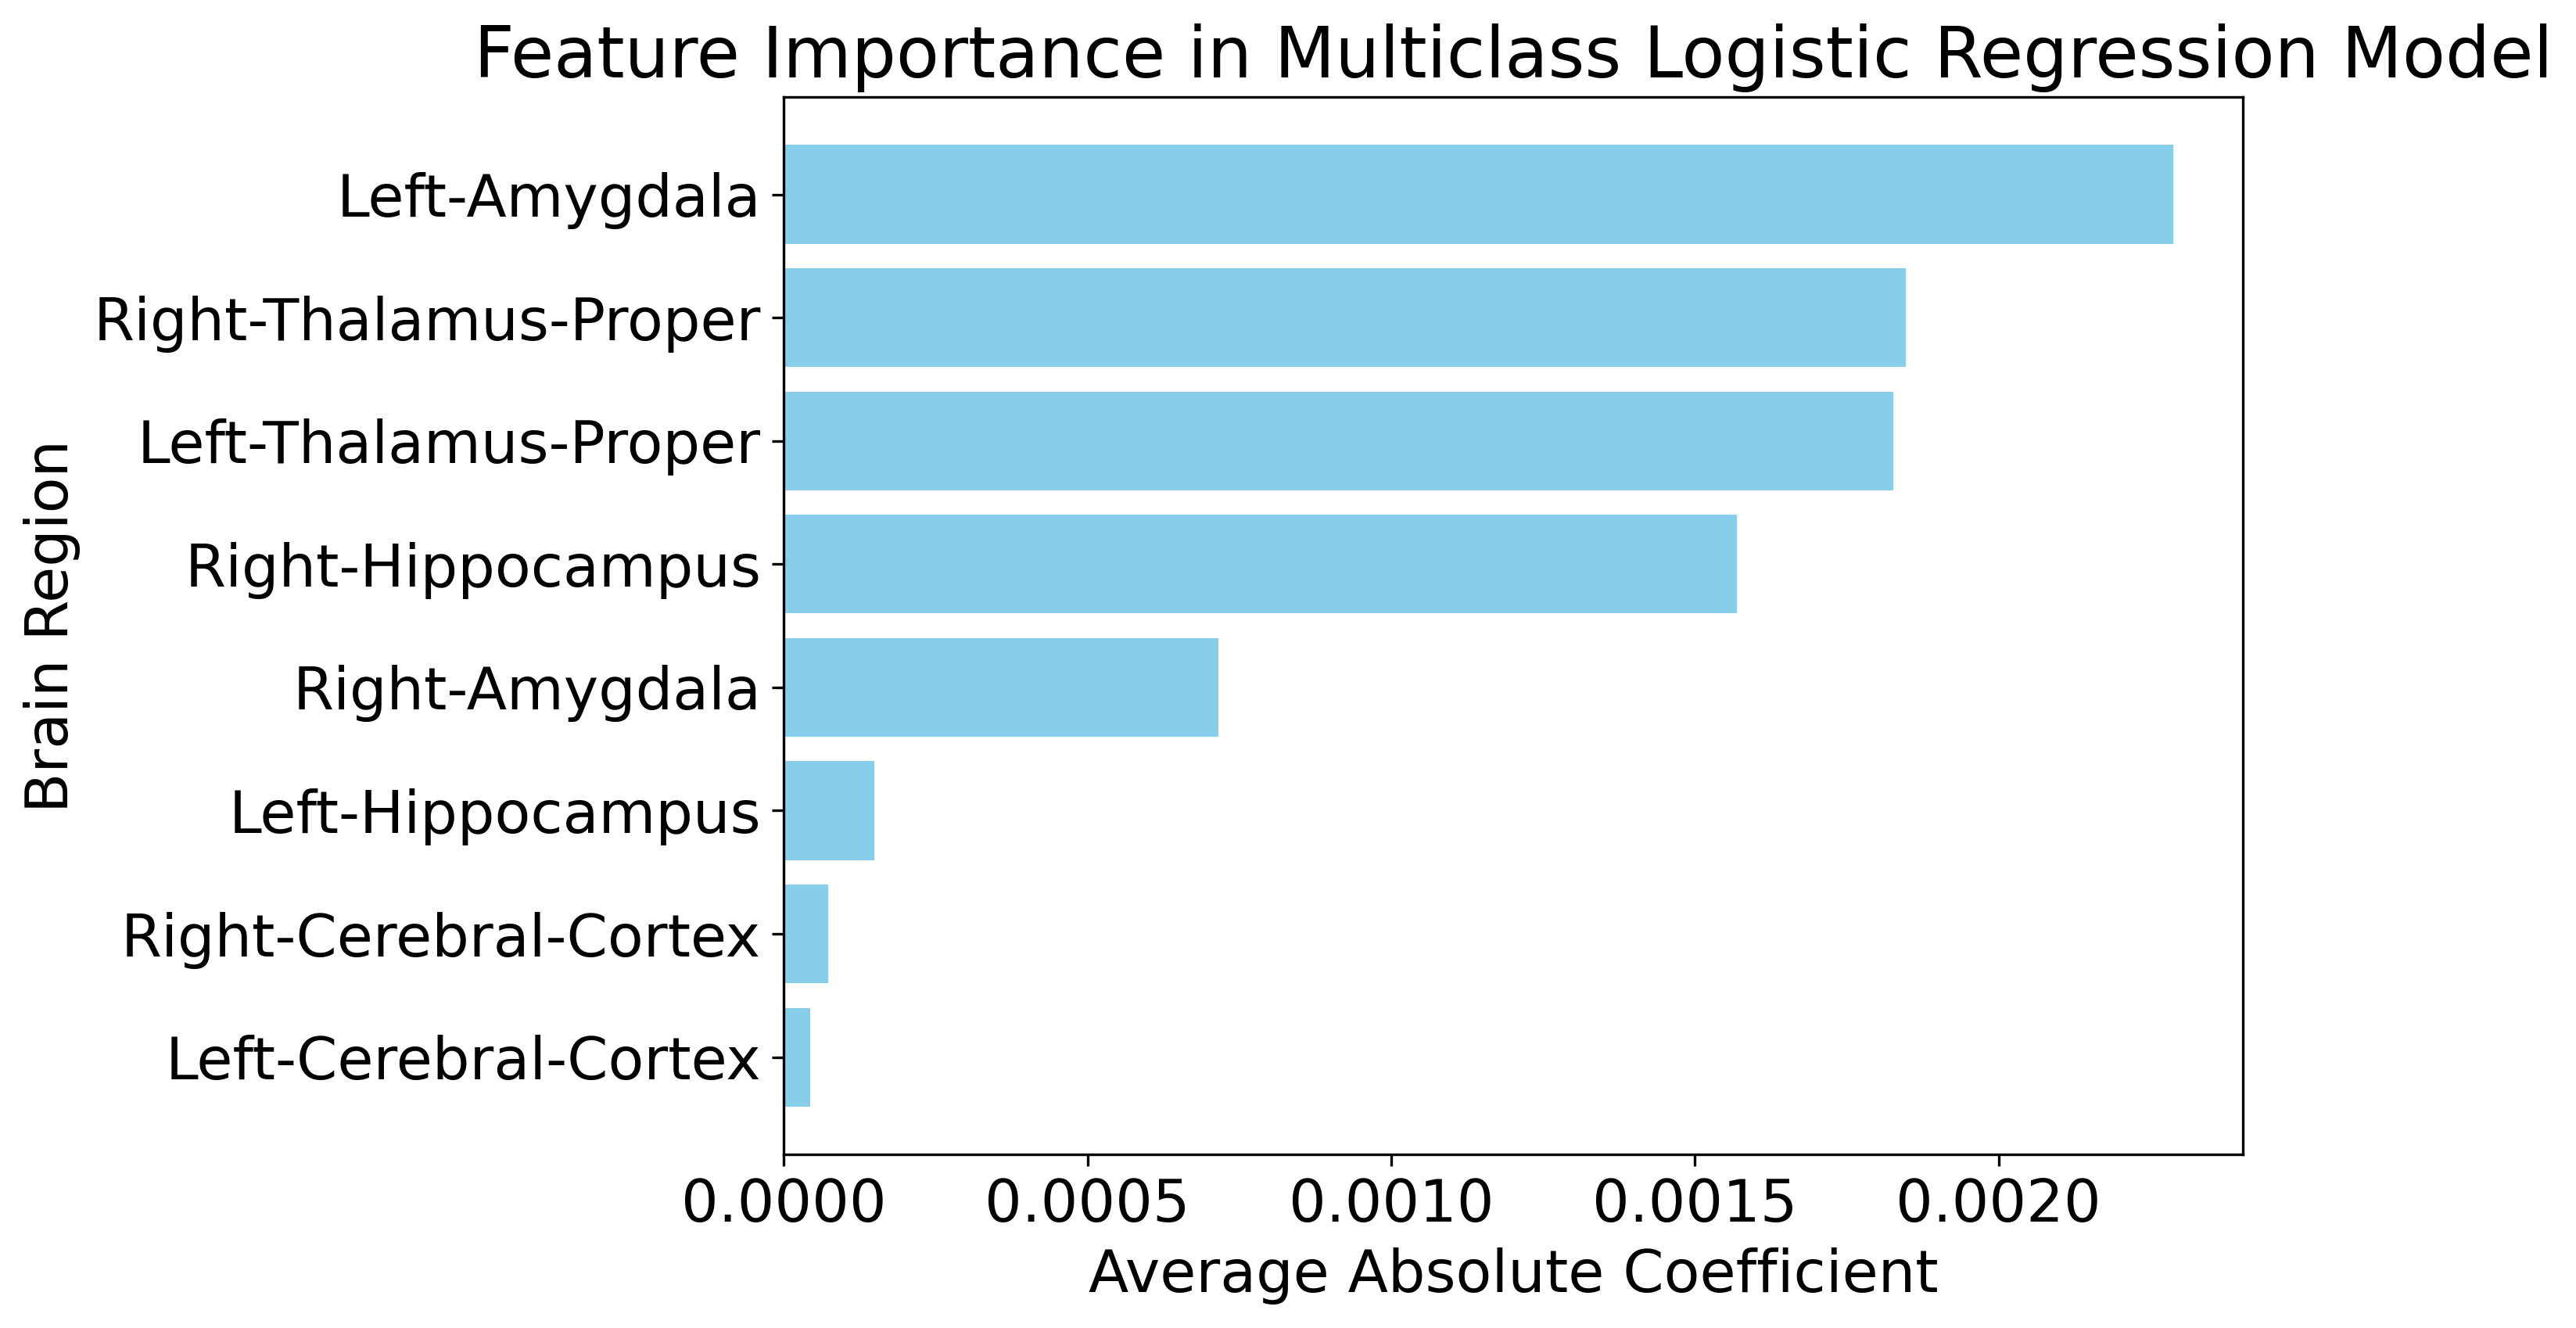

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

plt.rcParams.update({'font.size': 18})
#Compute coefficients per class
coef_df = pd.DataFrame(model.coef_, columns=X.columns)
coef_df.index = model.classes_  # Each row corresponds to a diagnosis label
print("Coefficients for each class:\n", coef_df)

#Compute average absolute importance across classes
mean_importance = np.mean(np.abs(model.coef_), axis=0)
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Average_Absolute_Coefficient': mean_importance
})
importance_df = importance_df.sort_values(by='Average_Absolute_Coefficient', ascending=False)
print("\nAverage absolute coefficient for each feature (higher means more impact):")
print(importance_df)

#Plot the feature importance as a horizontal bar chart
importance_df_sorted = importance_df.sort_values(by='Average_Absolute_Coefficient', ascending=True)

plt.figure(figsize=(10, 6), dpi = 300)
plt.barh(importance_df_sorted['Feature'], importance_df_sorted['Average_Absolute_Coefficient'], color='skyblue')
plt.xlabel('Average Absolute Coefficient')
plt.ylabel('Brain Region')
plt.title('Feature Importance in Multiclass Logistic Regression Model')
plt.tight_layout()
plt.savefig("Morphometric_Graph.png", dpi=300)  # Save first
plt.show()  # Then display
files.download("Morphometric_Graph.png")
